In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import requests


%matplotlib inline

The data contains information not just per country, but also grouped per region, continent, economic status. This extra informations are not useful for this project and I chose to keep just the rows containing countries + World informations. 

Used webscraping for creating a list with the country name and add World to the list. 

In [2]:
url = "https://laendercode.net/en/3-letter-list.html"

countries = BeautifulSoup(requests.get(url).content, "html.parser")

country_list = countries.find_all("tr")

In [3]:
for i in range(1,len(country_list)):
    country_list[i]= country_list[i].find_all("td")

In [4]:
country_names = []

parse = [country_list[i] for i in range(1,len(country_list))]

for items in parse:
    country_names.append(items[1].text)

In [5]:
country_names.append("World")
country_names.append("Rest of World")

In [6]:
country_names

['Afghanistan',
 'Aland Islands',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antarctica',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bonaire, Saint Eustatius and Saba ',
 'Bosnia and Herzegovina',
 'Botswana',
 'Bouvet Island',
 'Brazil',
 'British Indian Ocean Territory',
 'British Virgin Islands',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Christmas Island',
 'Cocos Islands',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'East Timor',
 'Ecuador',
 'E

In [7]:
len(country_names)

254

## Sex ratio at birth 

### Male per 100 Female

In [8]:
birth_ratio = pd.read_csv("../data/original_data/sex-ratio-at-birth.csv")

In [9]:
birth_ratio.head()

,Entity,Code,Year,Sex ratio at birth (male births per female births) (male births per 100 female births)
0,Afghanistan,AFG,1962,106.0
1,Afghanistan,AFG,1967,106.0
2,Afghanistan,AFG,1972,106.0
3,Afghanistan,AFG,1977,106.0
4,Afghanistan,AFG,1982,106.0


In [10]:
birth_ratio.dtypes

Entity                                                                                     object
Code                                                                                       object
Year                                                                                        int64
Sex ratio at birth (male births per female births) (male births per 100 female births)    float64
dtype: object

In [11]:
birth_ratio["Entity"].value_counts()

Paraguay                 21
Bulgaria                 21
Italy                    21
Mexico                   21
Tunisia                  21
                         ..
Sub-Saharan Africa       20
Europe & Central Asia    20
Small states             20
Palestine                15
Serbia                   15
Name: Entity, Length: 240, dtype: int64

No data for all years. 


In [12]:
birth_ratio.isna().sum()

Entity                                                                                      0
Code                                                                                      921
Year                                                                                        0
Sex ratio at birth (male births per female births) (male births per 100 female births)      0
dtype: int64

In [13]:
birth_ratio.rename(columns = {"Entity" : "Country", "Sex ratio at birth (male births per female births) (male births per 100 female births)": "Sex ratio at birth"}, inplace = True)

In [14]:
birth_ratio.head()

,Country,Code,Year,Sex ratio at birth
0,Afghanistan,AFG,1962,106.0
1,Afghanistan,AFG,1967,106.0
2,Afghanistan,AFG,1972,106.0
3,Afghanistan,AFG,1977,106.0
4,Afghanistan,AFG,1982,106.0


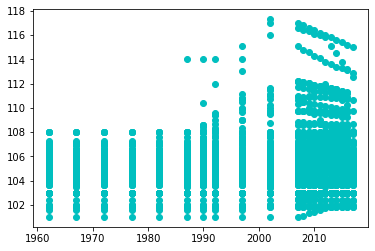

In [15]:

plt.scatter(data = birth_ratio, x = "Year", y = "Sex ratio at birth", c = "c");

The column "Code" seems to have a lot of Nan-values. Look deeper into those rows

In [16]:
birth_ratio.loc[birth_ratio["Code"].isna()]

,Country,Code,Year,Sex ratio at birth
105,Arab World,NaN,1962,105.167470
106,Arab World,NaN,1967,105.161387
107,Arab World,NaN,1972,105.141635
108,Arab World,NaN,1977,105.100513
109,Arab World,NaN,1982,105.058423
...,...,...,...,...
4789,Upper middle income,NaN,2012,110.127265
4790,Upper middle income,NaN,2013,110.033334
4791,Upper middle income,NaN,2014,110.003750
4792,Upper middle income,NaN,2015,109.863171


Looks like the NaN values are for non countries. Drop rows without country name. 

In [17]:
birth_ratio = birth_ratio[birth_ratio["Country"].isin(country_names)]

In [18]:
birth_ratio.head()

,Country,Code,Year,Sex ratio at birth
0,Afghanistan,AFG,1962,106.0
1,Afghanistan,AFG,1967,106.0
2,Afghanistan,AFG,1972,106.0
3,Afghanistan,AFG,1977,106.0
4,Afghanistan,AFG,1982,106.0


In [19]:
birth_ratio["Country"].value_counts()

Paraguay                 21
Pakistan                 21
Angola                   21
Sao Tome and Principe    21
Canada                   21
                         ..
Rwanda                   21
China                    21
Poland                   21
World                    20
Serbia                   15
Name: Country, Length: 186, dtype: int64

In [20]:
birth_ratio["Year"] = pd.to_datetime(birth_ratio["Year"], format = '%Y')

In [21]:
birth_ratio.head()

,Country,Code,Year,Sex ratio at birth
0,Afghanistan,AFG,1962-01-01,106.0
1,Afghanistan,AFG,1967-01-01,106.0
2,Afghanistan,AFG,1972-01-01,106.0
3,Afghanistan,AFG,1977-01-01,106.0
4,Afghanistan,AFG,1982-01-01,106.0


In [22]:
birth_ratio.dtypes

Country                       object
Code                          object
Year                  datetime64[ns]
Sex ratio at birth           float64
dtype: object

In [23]:
birth_ratio.to_csv("../data/gender-ratio-at-birth.csv", index = False)

## Female population

### % of total

In [24]:
female_pop = pd.read_csv("../data/original_data/share-population-female.csv")

In [25]:
female_pop.head()

,Entity,Code,Year,"Population, female (% of total) (% of total)"
0,Afghanistan,AFG,1960,48.319478
1,Afghanistan,AFG,1961,48.410528
2,Afghanistan,AFG,1962,48.495956
3,Afghanistan,AFG,1963,48.575984
4,Afghanistan,AFG,1964,48.650651


In [26]:
female_pop.dtypes

Entity                                           object
Code                                             object
Year                                              int64
Population, female (% of total) (% of total)    float64
dtype: object

In [27]:
female_pop["Year"] = pd.to_datetime(female_pop["Year"], format = '%Y')

In [28]:
female_pop.dtypes

Entity                                                  object
Code                                                    object
Year                                            datetime64[ns]
Population, female (% of total) (% of total)           float64
dtype: object

In [29]:
female_pop.isna().sum()

Entity                                             0
Code                                            2668
Year                                               0
Population, female (% of total) (% of total)       0
dtype: int64

In [30]:
female_pop["Entity"].value_counts()

Czech Republic              58
Central African Republic    58
Iraq                        58
Brazil                      58
Ghana                       58
                            ..
Italy                       58
Malawi                      58
Eritrea                     52
Palestine                   28
Serbia                      28
Name: Entity, Length: 240, dtype: int64

In [31]:
na_code = female_pop.loc[female_pop["Code"].isna()]

In [32]:
na_code["Entity"].value_counts()

Late-demographic dividend                             58
Latin America & Caribbean                             58
Europe & Central Asia                                 58
Early-demographic dividend                            58
Small states                                          58
North America                                         58
OECD members                                          58
Sub-Saharan Africa (IDA & IBRD)                       58
Low income                                            58
Middle East & North Africa                            58
Low & middle income                                   58
Syrian Arab Republic                                  58
Middle East & North Africa (excluding high income)    58
Fragile and conflict affected situations              58
Europe & Central Asia (excluding high income)         58
IDA & IBRD total                                      58
East Asia & Pacific (excluding high income)           58
East Asia & Pacific (IDA & IBRD

In [33]:
female_pop.rename(columns = {"Entity" : "Country", "Population, female (% of total) (% of total)" : "Female pop rate"}, inplace = True)

In [34]:
female_pop = female_pop[female_pop["Country"].isin(country_names)]

In [35]:
female_pop.isna().sum()

Country            0
Code               0
Year               0
Female pop rate    0
dtype: int64

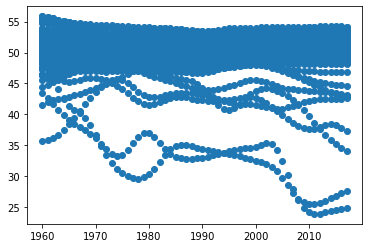

In [36]:
plt.scatter(data = female_pop, x = "Year", y = "Female pop rate");

##### Female pop rate column has too many decimals. Round it to 2 decimal points. 

In [37]:
female_pop["Female pop rate"] = female_pop["Female pop rate"].round(decimals = 2)

In [38]:
female_pop.head()

,Country,Code,Year,Female pop rate
0,Afghanistan,AFG,1960-01-01,48.32
1,Afghanistan,AFG,1961-01-01,48.41
2,Afghanistan,AFG,1962-01-01,48.50
3,Afghanistan,AFG,1963-01-01,48.58
4,Afghanistan,AFG,1964-01-01,48.65


In [39]:
female_pop.to_csv("../data/female-population-rate.csv", index = False)

## Child Mortality


Too many missing values. Is even useful? 

In [40]:
mortality = pd.read_csv("../data/original_data/child-mortality-by-sex.csv")

In [41]:
mortality.head()

,Entity,Code,Year,Child mortality rate of girls (%),Child mortality rate of boys (%),Total population (Gapminder)
0,Afghanistan,AFG,1800,NaN,NaN,3280000.0
1,Afghanistan,AFG,1801,NaN,NaN,3280000.0
2,Afghanistan,AFG,1802,NaN,NaN,3280000.0
3,Afghanistan,AFG,1803,NaN,NaN,3280000.0
4,Afghanistan,AFG,1804,NaN,NaN,3280000.0


In [42]:
mortality.isna().sum()

Entity                                   0
Code                                  1027
Year                                     0
Child mortality rate of girls (%)    45913
Child mortality rate of boys (%)     45913
Total population (Gapminder)           225
dtype: int64

In [43]:
mortality["Child mortality rate of girls (%)"].isna().sum() / len(mortality["Child mortality rate of girls (%)"])

0.9746327587670884

In [44]:
mortality["Child mortality rate of girls (%)"].isna().sum()

45913

In [45]:
len(mortality["Child mortality rate of girls (%)"]) - mortality["Child mortality rate of girls (%)"].isna().sum()

1195

In [46]:
mortality["Child mortality rate of boys (%)"].isna().sum()

45913

In [47]:
mortality["Child mortality rate of boys (%)"].isna().sum() / len(mortality["Child mortality rate of boys (%)"])

0.9746327587670884

In [48]:
no_na = mortality.loc[~mortality["Child mortality rate of girls (%)"].isna()]

In [49]:
no_na["Year"].value_counts()

2017    239
1990    239
2000    239
2015    239
2010    239
Name: Year, dtype: int64

In [50]:
mortality["Year"].value_counts()

2017    287
2010    287
2000    287
1990    287
2015    287
       ... 
1770      6
1710      6
1730      6
1760      6
1         1
Name: Year, Length: 258, dtype: int64

## Sex ratio at birth by birth order

In China and South Korea

In [51]:
birth_order = pd.read_csv("../data/original_data/sex-ratio-at-birth-by-birth-order.csv")

In [52]:
birth_order.head()

,Entity,Code,Year,First child (male births per 100 female births),Second child (male births per 100 female births),Third child (male births per 100 female births),Fourth child & higher (male births per 100 female births)
0,China,CHN,1981,105.33,107.16,112.59,NaN
1,China,CHN,1986,107.66,117.25,123.29,NaN
2,China,CHN,1989,105.20,121.02,126.60,NaN
3,China,CHN,1993,105.60,130.22,126.13,NaN
4,China,CHN,2000,107.12,151.92,159.36,NaN


In [53]:
birth_order.isna().sum()

Entity                                                       0
Code                                                         0
Year                                                         0
First child (male births per 100 female births)              0
Second child (male births per 100 female births)             0
Third child (male births per 100 female births)              0
Fourth child & higher (male births per 100 female births)    7
dtype: int64

In [54]:
len(birth_order)

55

In [55]:
birth_order["Entity"].value_counts()

South Korea    48
China           7
Name: Entity, dtype: int64

In [56]:
birth_order.dtypes

Entity                                                        object
Code                                                          object
Year                                                           int64
First child (male births per 100 female births)              float64
Second child (male births per 100 female births)             float64
Third child (male births per 100 female births)              float64
Fourth child & higher (male births per 100 female births)    float64
dtype: object

In [57]:
birth_order.rename(columns = {"Entity" : "Country"}, inplace = True)

In [58]:
birth_order["Year"] = pd.to_datetime(birth_order["Year"], format = '%Y')

In [59]:
birth_order.head()

,Country,Code,Year,First child (male births per 100 female births),Second child (male births per 100 female births),Third child (male births per 100 female births),Fourth child & higher (male births per 100 female births)
0,China,CHN,1981-01-01,105.33,107.16,112.59,NaN
1,China,CHN,1986-01-01,107.66,117.25,123.29,NaN
2,China,CHN,1989-01-01,105.20,121.02,126.60,NaN
3,China,CHN,1993-01-01,105.60,130.22,126.13,NaN
4,China,CHN,2000-01-01,107.12,151.92,159.36,NaN


In [60]:
birth_order.to_csv("../data/sex-ratio-by-bith-order-ch-kr.csv", index = False)

## Missing women

In [61]:
missing_women = pd.read_csv("../data/original_data/global-number-of-missing-women.csv")

In [62]:
missing_women.head()

,Entity,Code,Year,Number of missing women (missing women)
0,China,CHN,1970,27200000
1,China,CHN,1975,29000000
2,China,CHN,1980,31800000
3,China,CHN,1985,33200000
4,China,CHN,1990,39200000


In [63]:
missing_women.dtypes

Entity                                     object
Code                                       object
Year                                        int64
Number of missing women (missing women)     int64
dtype: object

In [64]:
missing_women["Year"] = pd.to_datetime(missing_women["Year"], format = '%Y')

In [65]:
missing_women.isna().sum()

Entity                                      0
Code                                       17
Year                                        0
Number of missing women (missing women)     0
dtype: int64

In [66]:
missing_women.rename(columns = {"Entity": "Country", "Number of missing women (missing women)" : "Missing women"}, inplace = True)

In [67]:
missing_women["Country"].value_counts()

India            17
World            17
China            17
Rest of World    17
Name: Country, dtype: int64

In [68]:
missing_women["Year"].value_counts().sort_index()

1970-01-01    4
1975-01-01    4
1980-01-01    4
1985-01-01    4
1990-01-01    4
1995-01-01    4
2000-01-01    4
2005-01-01    4
2010-01-01    4
2015-01-01    4
2020-01-01    4
2025-01-01    4
2030-01-01    4
2035-01-01    4
2040-01-01    4
2045-01-01    4
2050-01-01    4
Name: Year, dtype: int64

In [69]:
missing_women.loc[missing_women["Country"] == "Rest of World"]

,Country,Code,Year,Missing women
34,Rest of World,NaN,1970-01-01,12100000
35,Rest of World,NaN,1975-01-01,12500000
36,Rest of World,NaN,1980-01-01,13300000
37,Rest of World,NaN,1985-01-01,14600000
38,Rest of World,NaN,1990-01-01,15200000
39,Rest of World,NaN,1995-01-01,16300000
40,Rest of World,NaN,2000-01-01,17400000
41,Rest of World,NaN,2005-01-01,19500000
42,Rest of World,NaN,2010-01-01,20100000
43,Rest of World,NaN,2015-01-01,22800000


In [70]:
missing_women.loc[missing_women["Country"] == "India"]

,Country,Code,Year,Missing women
17,India,IND,1970-01-01,21800000
18,India,IND,1975-01-01,24800000
19,India,IND,1980-01-01,27100000
20,India,IND,1985-01-01,30200000
21,India,IND,1990-01-01,33200000
22,India,IND,1995-01-01,36100000
23,India,IND,2000-01-01,38900000
24,India,IND,2005-01-01,41100000
25,India,IND,2010-01-01,43300000
26,India,IND,2015-01-01,44900000


In [71]:
missing_women.to_csv("../data/missing-women-ch-in.csv", index = False)

## Missing female birth

for India, China and rest of world

In [72]:
missing_birth = pd.read_csv("../data/original_data/missing-female-births-and-excess-mortality.csv")

In [73]:
missing_birth.head()

,Entity,Code,Year,Excess female deaths (excess deaths),Missing female births (missing births)
0,China,CHN,1975,320000,NaN
1,China,CHN,1980,420000,NaN
2,China,CHN,1985,500000,170000.0
3,China,CHN,1990,570000,470000.0
4,China,CHN,1995,540000,680000.0


In [74]:
missing_birth.dtypes

Entity                                     object
Code                                       object
Year                                        int64
Excess female deaths (excess deaths)        int64
Missing female births (missing births)    float64
dtype: object

In [75]:
missing_birth["Year"] = pd.to_datetime(missing_birth["Year"], format = '%Y')

In [76]:
missing_birth.isna().sum()

Entity                                     0
Code                                      16
Year                                       0
Excess female deaths (excess deaths)       0
Missing female births (missing births)     8
dtype: int64

In [77]:
missing_birth["Entity"].value_counts()

India            16
World            16
China            16
Rest of World    16
Name: Entity, dtype: int64

In [78]:
missing_birth["Year"].value_counts().sort_index()

1975-01-01    4
1980-01-01    4
1985-01-01    4
1990-01-01    4
1995-01-01    4
2000-01-01    4
2005-01-01    4
2010-01-01    4
2015-01-01    4
2020-01-01    4
2025-01-01    4
2030-01-01    4
2035-01-01    4
2040-01-01    4
2045-01-01    4
2050-01-01    4
Name: Year, dtype: int64

In [79]:
missing_birth.rename(columns = {"Entity" : "Country", "Excess female deaths (excess deaths)" : "Excess female deaths", "Missing female births (missing births)": "Missing female births"}, inplace = True)

In [80]:
missing_birth.head()

,Country,Code,Year,Excess female deaths,Missing female births
0,China,CHN,1975-01-01,320000,NaN
1,China,CHN,1980-01-01,420000,NaN
2,China,CHN,1985-01-01,500000,170000.0
3,China,CHN,1990-01-01,570000,470000.0
4,China,CHN,1995-01-01,540000,680000.0


In [81]:
missing_birth.to_csv("../data/missing-female-birth-ch-in.csv", index = False)

## Sex ratio by age

In [82]:
ratio_age = pd.read_csv("../data/original_data/sex-ratio-by-age.csv")

In [83]:
ratio_age.head()

,Entity,Code,Year,100-year olds (males per 100 females),15-year olds (males per 100 females),20-year olds (males per 100 females),30-year olds (males per 100 females),40-year olds (males per 100 females),50-year olds (males per 100 females),60-year olds (males per 100 females),70-year olds (males per 100 females),80-year olds (males per 100 females),90-year olds (males per 100 females)
0,Afghanistan,AFG,1950,NaN,110.725960,115.678881,118.566663,119.636455,124.993101,130.460824,130.004055,NaN,NaN
1,Afghanistan,AFG,1951,NaN,110.239836,114.390486,118.288218,119.375972,124.586307,130.063446,129.302326,NaN,NaN
2,Afghanistan,AFG,1952,NaN,109.217998,112.674319,117.518995,118.787630,123.710621,129.190856,127.946743,NaN,NaN
3,Afghanistan,AFG,1953,NaN,108.646649,111.340221,117.060109,118.236943,122.198021,127.650155,126.501222,NaN,NaN
4,Afghanistan,AFG,1954,NaN,108.700272,110.692684,117.101741,117.753065,119.957057,125.267577,125.063549,NaN,NaN


In [84]:
ratio_age.isna().sum()

Entity                                       0
Code                                      2574
Year                                         0
100-year olds (males per 100 females)    10568
15-year olds (males per 100 females)         0
20-year olds (males per 100 females)         0
30-year olds (males per 100 females)         0
40-year olds (males per 100 females)         0
50-year olds (males per 100 females)         0
60-year olds (males per 100 females)         0
70-year olds (males per 100 females)         0
80-year olds (males per 100 females)      9640
90-year olds (males per 100 females)      9641
dtype: int64

In [85]:
ratio_age.shape

(15906, 13)

In [86]:
ratio_age.isna().sum() / len(ratio_age)

Entity                                   0.000000
Code                                     0.161826
Year                                     0.000000
100-year olds (males per 100 females)    0.664403
15-year olds (males per 100 females)     0.000000
20-year olds (males per 100 females)     0.000000
30-year olds (males per 100 females)     0.000000
40-year olds (males per 100 females)     0.000000
50-year olds (males per 100 females)     0.000000
60-year olds (males per 100 females)     0.000000
70-year olds (males per 100 females)     0.000000
80-year olds (males per 100 females)     0.606061
90-year olds (males per 100 females)     0.606123
dtype: float64

For the columns = 80-year olds, 90-year olds and 100-year olds there is more than 60% of missing values. Based on the fact that the life expectancy is around 80 years, I decided to keep the columns with missing values without replacing it. 

In [87]:
ratio_age["Entity"].value_counts()

Czech Republic            66
Oman                      66
Iraq                      66
Brazil                    66
Ghana                     66
                          ..
Less developed regions    66
Lesotho                   66
Solomon Islands           66
Africa                    66
Guinea-Bissau             66
Name: Entity, Length: 241, dtype: int64

In [88]:
ratio_age.columns

Index(['Entity', 'Code', 'Year', '100-year olds (males per 100 females)',
       '15-year olds (males per 100 females)',
       '20-year olds (males per 100 females)',
       '30-year olds (males per 100 females)',
       '40-year olds (males per 100 females)',
       '50-year olds (males per 100 females)',
       '60-year olds (males per 100 females)',
       '70-year olds (males per 100 females)',
       '80-year olds (males per 100 females)',
       '90-year olds (males per 100 females)'],
      dtype='object')

In [89]:
ratio_age.rename(columns = {"Entity" : "Country",
                            '15-year olds (males per 100 females)' : '15 years old',
                            '20-year olds (males per 100 females)' : '20 years old',
                            '30-year olds (males per 100 females)' : '30 years old',
                            '40-year olds (males per 100 females)' : '40 years old',
                            '50-year olds (males per 100 females)' : '50 years old',
                            '60-year olds (males per 100 females)' : '60 years old',
                            '70-year olds (males per 100 females)' : '70 years old',
                            '80-year olds (males per 100 females)' : '80 years old',
                            '90-year olds (males per 100 females)' : '90 years old',
                            '100-year olds (males per 100 females)' : '100 years old'}, inplace = True)

In [90]:
ratio_age.dtypes

Country           object
Code              object
Year               int64
100 years old    float64
15 years old     float64
20 years old     float64
30 years old     float64
40 years old     float64
50 years old     float64
60 years old     float64
70 years old     float64
80 years old     float64
90 years old     float64
dtype: object

In [91]:
ratio_age["Year"] = pd.to_datetime(ratio_age["Year"], format = '%Y')

In [92]:
ratio_age = ratio_age[ratio_age["Country"].isin(country_names)]

In [93]:
ratio_age[['15 years old',
           '20 years old',
           '30 years old',
           '40 years old',
           '50 years old',
           '60 years old',
           '70 years old',
           '80 years old',
           '90 years old',
           '100 years old']] = ratio_age[['15 years old',
                                          '20 years old',
                                          '30 years old',
                                          '40 years old',
                                          '50 years old',
                                          '60 years old',
                                          '70 years old',
                                          '80 years old',
                                          '90 years old',
                                          '100 years old']].round(decimals = 2)

In [94]:
ratio_age.head()

,Country,Code,Year,100 years old,15 years old,20 years old,30 years old,40 years old,50 years old,60 years old,70 years old,80 years old,90 years old
0,Afghanistan,AFG,1950-01-01,NaN,110.73,115.68,118.57,119.64,124.99,130.46,130.00,NaN,NaN
1,Afghanistan,AFG,1951-01-01,NaN,110.24,114.39,118.29,119.38,124.59,130.06,129.30,NaN,NaN
2,Afghanistan,AFG,1952-01-01,NaN,109.22,112.67,117.52,118.79,123.71,129.19,127.95,NaN,NaN
3,Afghanistan,AFG,1953-01-01,NaN,108.65,111.34,117.06,118.24,122.20,127.65,126.50,NaN,NaN
4,Afghanistan,AFG,1954-01-01,NaN,108.70,110.69,117.10,117.75,119.96,125.27,125.06,NaN,NaN


In [95]:
ratio_age.to_csv("../data/sex-ratio-by-age.csv", index = False)

## Sex ratio at 5 years old

In [96]:
ratio_5 = pd.read_csv("../data/original_data/sex-ratio-at-five-years-old.csv")

In [97]:
ratio_5.head()

,Entity,Code,Year,Five-year olds (boys per 100 girls)
0,Afghanistan,AFG,1950,103.088241
1,Afghanistan,AFG,1951,100.610669
2,Afghanistan,AFG,1952,97.613596
3,Afghanistan,AFG,1953,95.081516
4,Afghanistan,AFG,1954,93.725327


In [98]:
ratio_5.shape

(15906, 4)

In [99]:
ratio_5.isna().sum()

Entity                                    0
Code                                   2574
Year                                      0
Five-year olds (boys per 100 girls)       0
dtype: int64

In [100]:
ratio_5["Entity"].value_counts()

Czech Republic            66
Oman                      66
Iraq                      66
Brazil                    66
Ghana                     66
                          ..
Less developed regions    66
Lesotho                   66
Solomon Islands           66
Africa                    66
Guinea-Bissau             66
Name: Entity, Length: 241, dtype: int64

In [101]:
ratio_5.rename(columns = {"Entity" : "Country", "Five-year olds (boys per 100 girls)" : "5 years old"}, inplace = True)

In [102]:
ratio_5 = ratio_5[ratio_5["Country"].isin(country_names)]

In [103]:
ratio_5.dtypes

Country         object
Code            object
Year             int64
5 years old    float64
dtype: object

In [104]:
ratio_5["Year"] = pd.to_datetime(ratio_5["Year"], format = '%Y')

In [105]:
ratio_5["5 years old"] = ratio_5["5 years old"].round(decimals = 2)

In [106]:
ratio_5.head()

,Country,Code,Year,5 years old
0,Afghanistan,AFG,1950-01-01,103.09
1,Afghanistan,AFG,1951-01-01,100.61
2,Afghanistan,AFG,1952-01-01,97.61
3,Afghanistan,AFG,1953-01-01,95.08
4,Afghanistan,AFG,1954-01-01,93.73


In [107]:
ratio_5.to_csv("../data/sex-ratio-at-5-years.csv", index = False)

## Birth vs 5-years old

In [108]:
birth_vs_5 = pd.read_csv("../data/original_data/sex-ratio-at-birth-vs-five-years-old.csv")

In [109]:
birth_vs_5.head()

,Entity,Code,Year,Sex ratio at birth (male births per 100 female births),Sex ratio at five years old
0,Afghanistan,AFG,1950,NaN,103.088241
1,Afghanistan,AFG,1951,NaN,100.610669
2,Afghanistan,AFG,1952,NaN,97.613596
3,Afghanistan,AFG,1953,NaN,95.081516
4,Afghanistan,AFG,1954,NaN,93.725327


Don't need this now, since is just a merged table containing infomation from 2 datasets.

## Infant death by cause by sex

#### Global Information for 2017

In [110]:
infant_death = pd.read_csv("../data/original_data/infant-death-rates-by-cause-by-sex.csv")

In [111]:
infant_death

,Entity,Code,Year,"Infant mortality rates in boys (per 100,000) (deaths per 100,000)","Infant mortality rates in girls (per 100,000) (deaths per 100,000)"
0,Birth defects,NaN,2017,319.6,297.1
1,Diarrheal diseases,NaN,2017,251.5,228.7
2,Digestive anomalies,NaN,2017,36.3,28.2
3,Encephalitis,NaN,2017,9.1,9.4
4,Encephalopathy from asphyxia and trauma,NaN,2017,432.8,332.8
5,HIV/AIDS,NaN,2017,35.9,36.1
6,Heart anomalies,NaN,2017,134.4,127.3
7,Lower respiratory infections,NaN,2017,442.7,438.3
8,Malaria,NaN,2017,98.9,92.3
9,Measles,NaN,2017,17.9,17.8


In [112]:
infant_death.rename(columns = {"Infant mortality rates in boys (per 100,000) (deaths per 100,000)" : "Infant mortality rates - boys (per 100k)", "Infant mortality rates in girls (per 100,000) (deaths per 100,000)": "Infant mortality rates - girls (per 100k)", "Entity" : "Reason"}, inplace = True)

In [113]:
infant_death.dtypes

Reason                                        object
Code                                         float64
Year                                           int64
Infant mortality rates - boys (per 100k)     float64
Infant mortality rates - girls (per 100k)    float64
dtype: object

In [114]:
infant_death["Year"] = pd.to_datetime(infant_death["Year"], format = '%Y')

In [115]:
infant_death.isna().sum()

Reason                                        0
Code                                         18
Year                                          0
Infant mortality rates - boys (per 100k)      0
Infant mortality rates - girls (per 100k)     0
dtype: int64

In [116]:
infant_death.drop(columns = 'Code', inplace = True)

In [117]:
infant_death.dtypes

Reason                                               object
Year                                         datetime64[ns]
Infant mortality rates - boys (per 100k)            float64
Infant mortality rates - girls (per 100k)           float64
dtype: object

In [118]:
infant_death.to_csv("../data/infant-death-cause-global.csv", index = False)

## Infant death by cause by sex

#### India information for 2017

In [119]:
infant_death_india = pd.read_csv("../data/original_data/child-deaths-by-cause-by-sex-india.csv")

In [120]:
infant_death_india

,Entity,Code,Year,"Child death rates in boys (per 100,000) (deaths per 100,000)","Child death rates in girls (per 100,000) (deaths per 100,000)"
0,Acute hepatitis,NaN,2017,2.777888,4.333474
1,Birth defects,NaN,2017,5.092846,7.074653
2,Chronic respiratory diseases,NaN,2017,1.082364,1.497562
3,Diarrheal diseases,NaN,2017,19.065209,29.122045
4,Digestive diseases,NaN,2017,2.594122,3.246213
5,Encephalitis,NaN,2017,3.669593,5.725556
6,Enteric infections,NaN,2017,30.739875,39.307895
7,Heart anomalies,NaN,2017,3.057078,4.510047
8,Kidney disease,NaN,2017,0.306952,0.591764
9,Liver diseases,NaN,2017,1.255518,1.514467


In [121]:
infant_death_india.rename(columns = {"Child death rates in boys (per 100,000) (deaths per 100,000)" : "India infant mortality rates - boys (per 100k)", "Child death rates in girls (per 100,000) (deaths per 100,000)": "India infant mortality rates - girls (per 100k)", "Entity" : "Reason"}, inplace = True)

In [122]:
infant_death_india.dtypes

Reason                                              object
Code                                               float64
Year                                                 int64
India infant mortality rates - boys (per 100k)     float64
India infant mortality rates - girls (per 100k)    float64
dtype: object

In [123]:
infant_death_india["Year"] = pd.to_datetime(infant_death_india["Year"], format = '%Y')

In [124]:
infant_death_india.isna().sum()

Reason                                              0
Code                                               21
Year                                                0
India infant mortality rates - boys (per 100k)      0
India infant mortality rates - girls (per 100k)     0
dtype: int64

In [125]:
infant_death_india.drop(columns = 'Code', inplace = True)

In [126]:
infant_death_india[["India infant mortality rates - boys (per 100k)", "India infant mortality rates - girls (per 100k)"]] = infant_death_india[["India infant mortality rates - boys (per 100k)", "India infant mortality rates - girls (per 100k)"]].round(decimals = 2)

In [127]:
infant_death_india

,Reason,Year,India infant mortality rates - boys (per 100k),India infant mortality rates - girls (per 100k)
0,Acute hepatitis,2017-01-01,2.78,4.33
1,Birth defects,2017-01-01,5.09,7.07
2,Chronic respiratory diseases,2017-01-01,1.08,1.50
3,Diarrheal diseases,2017-01-01,19.07,29.12
4,Digestive diseases,2017-01-01,2.59,3.25
5,Encephalitis,2017-01-01,3.67,5.73
6,Enteric infections,2017-01-01,30.74,39.31
7,Heart anomalies,2017-01-01,3.06,4.51
8,Kidney disease,2017-01-01,0.31,0.59
9,Liver diseases,2017-01-01,1.26,1.51


In [128]:
infant_death_india.to_csv("../data/infant-death-cause-india.csv", index = False)

## Sex ratio by birth Chao et al

#### data from 1950

In [129]:
chao = pd.read_csv("../data/original_data/sex-ratio-at-birth-males-chao-et-al.csv")

In [130]:
chao.head()

,Entity,Code,Year,Sex ratio at birth (male births per 100 female births)
0,Afghanistan,AFG,1950,105.188944
1,Afghanistan,AFG,1951,105.193156
2,Afghanistan,AFG,1952,105.184021
3,Afghanistan,AFG,1953,105.181066
4,Afghanistan,AFG,1954,105.192903


In [131]:
chao.isna().sum()

Entity                                                     0
Code                                                      68
Year                                                       0
Sex ratio at birth (male births per 100 female births)     0
dtype: int64

In [132]:
chao["Year"].value_counts().sort_index()

1950    212
1951    212
1952    212
1953    212
1954    212
       ... 
2013    212
2014    212
2015    212
2016    212
2017    212
Name: Year, Length: 68, dtype: int64

In [133]:
chao["Entity"].value_counts()

Czech Republic    68
Panama            68
Germany           68
Kuwait            68
Kenya             68
                  ..
Rwanda            68
Mayotte           68
Belize            68
Italy             68
Guinea-Bissau     68
Name: Entity, Length: 212, dtype: int64

In [134]:
chao.rename(columns = {"Entity" : "Country", "Sex ratio at birth (male births per 100 female births)" : "Sex ratio at birth"}, inplace = True)

In [135]:
chao = chao[chao["Country"].isin(country_names)]

In [136]:
chao.head()

,Country,Code,Year,Sex ratio at birth
0,Afghanistan,AFG,1950,105.188944
1,Afghanistan,AFG,1951,105.193156
2,Afghanistan,AFG,1952,105.184021
3,Afghanistan,AFG,1953,105.181066
4,Afghanistan,AFG,1954,105.192903


In [137]:
chao["Year"] = pd.to_datetime(chao["Year"], format = '%Y')

In [138]:
chao['Sex ratio at birth'] = chao['Sex ratio at birth'].round(decimals = 2)

In [139]:
chao.head()

,Country,Code,Year,Sex ratio at birth
0,Afghanistan,AFG,1950-01-01,105.19
1,Afghanistan,AFG,1951-01-01,105.19
2,Afghanistan,AFG,1952-01-01,105.18
3,Afghanistan,AFG,1953-01-01,105.18
4,Afghanistan,AFG,1954-01-01,105.19


In [140]:
chao.to_csv("../data/sex-ratio-at-birth-chao.csv", index = False)